In [2]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [3]:
raw_data = read.csv("../data/toy_problem_12_bit_data.csv")

In [4]:
raw_data$eigenbin <- cut(raw_data$eigencentrality, seq(0.0,1.1,0.04), right=FALSE)

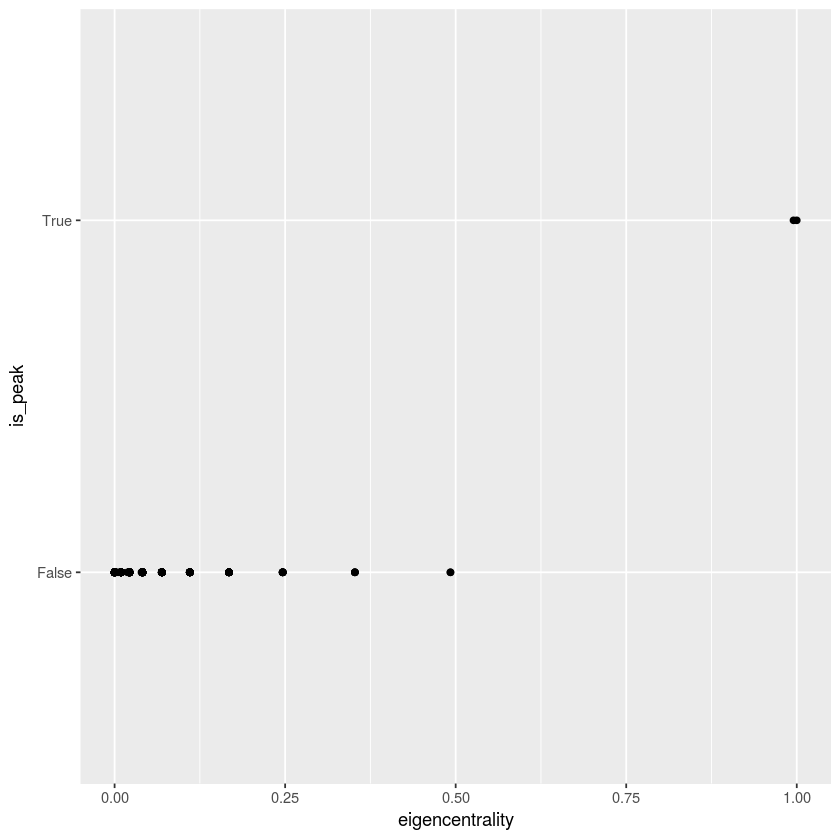

In [5]:
raw_data %>%
  ggplot(aes(x=eigencentrality, y=is_peak)) +
  geom_point()

In [6]:
peak_data = raw_data %>%
    group_by(eigenbin) %>%
    summarise(total_in_bin = n(), peak_counts = sum(is_peak == "True")) %>%
    mutate(percent = peak_counts/total_in_bin)

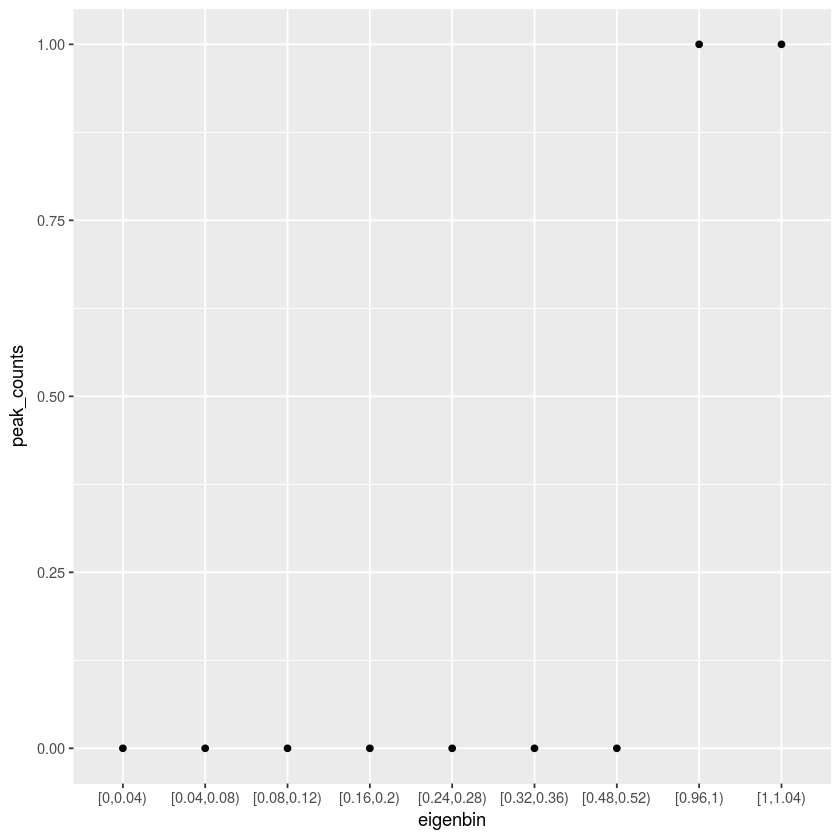

In [7]:
peak_data %>%
  ggplot(aes(x=eigenbin, y=peak_counts)) +
  geom_point()

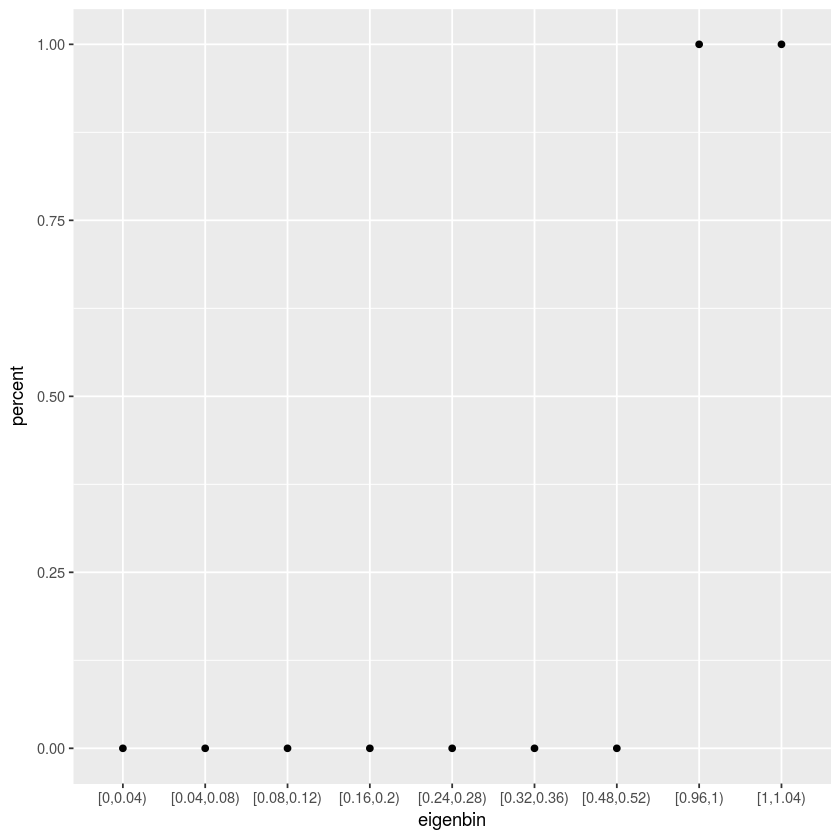

In [8]:
peak_data %>%
  ggplot(aes(x=eigenbin, y=percent)) +
  geom_point()

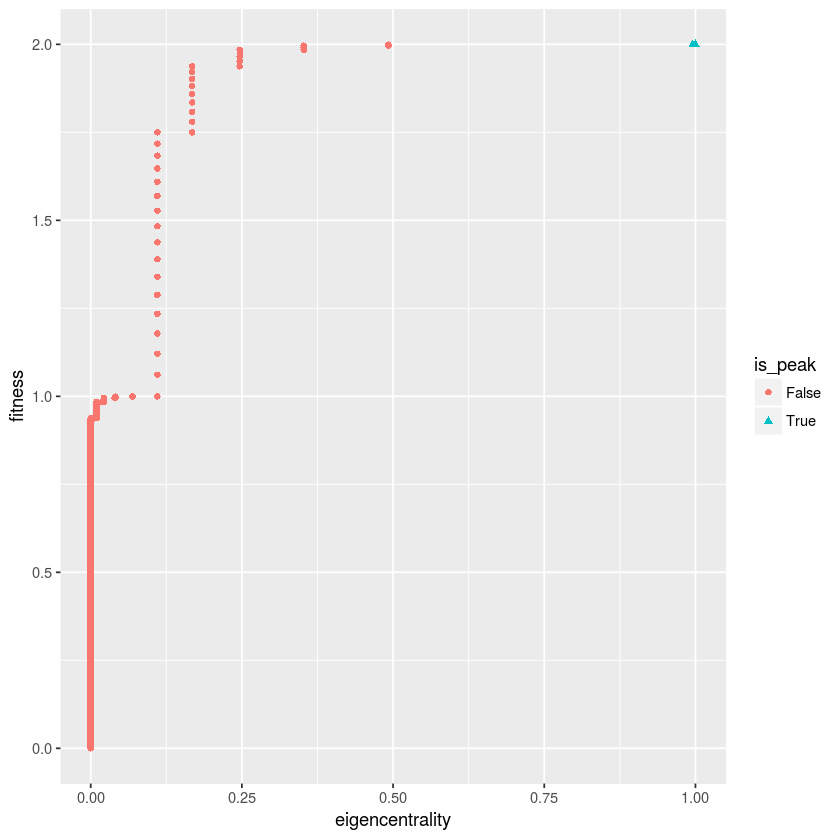

In [9]:
raw_data %>%
  ggplot(aes(x=eigencentrality, y=fitness, group=is_peak)) +
  geom_point(aes(shape=is_peak, color=is_peak))